## Creating Summary Figures

In [2]:
# python import statements
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn import metrics

# establishing directories
ROOTDIR = os.getcwd() # Home directory
CODEDIR = ROOTDIR + '/CODE/' # Code directory
DATADIR = ROOTDIR + '/DATA/' # Data directory
OUTPUTDIR = ROOTDIR + '/OUTPUT/' # Output directory
os.chdir(OUTPUTDIR) # Change directory

# User input
sitenames = ["DELA", "LENO", "TALL", "BONA", "HEAL", "TOOL", "SRER", "SJER", "CPER", "NIWO", "RMNP", "STER",
             "OSBS", "JERC", "PUUM", "KONZ", "UKFS", "SERC", "HARV", "UNDE", "BART", "NOGP", "WOOD", "OAES",
             "GUAN", "GRSM", "ORNL", "CLBJ", "MOAB", "ONAQ", "BLAN", "MLBS", "SCBI", "WREF", "STEI", "YELL"]
sitename = "ONAQ" # single site for time series plot
start_date = '01-01-2019'
end_date = '12-31-2019'

# import data based on selected dates
df_timeseries = pd.read_csv(str(sitename)+'_daily_timeseries.csv')
df_timeseries['DateTime'] = pd.to_datetime(df_timeseries['DateTime'])
mask = (df_timeseries['DateTime'] >= start_date) & (df_timeseries['DateTime'] <= end_date)
df_timeseries = df_timeseries.loc[mask]
t = df_timeseries['DateTime']
P = df_timeseries['Total P']
d2H = df_timeseries['d2H_1']
d18O = df_timeseries['d18O_1']

df_iso = pd.read_excel(DATADIR+'/IsoData/'+str(sitename)+'IsoData.xlsx')
df_iso['collectDate'] = pd.to_datetime(df_iso['collectDate'])
mask = (df_iso['collectDate'] >= '2019/01/01') & (df_iso['collectDate'] <= '2019/12/31')
df_iso = df_iso.loc[mask]
biweekly_t = df_iso['collectDate']
biweekly_H = df_iso['d2HWater']
biweekly_O = df_iso['d18OWater']

df_corrected = pd.read_csv(str(sitename)+'_daily_timeseries.csv')

In [3]:
# creating summary table

os.chdir(ROOTDIR) # Change directory

# empty lists to add to
df_summary = []
site_name = []
site_ID = []
lat = []
long = []
start = []
end = []
records = []
H_daily_mean = []
O_daily_mean = []
H_daily_std = []
O_daily_std = []
H_biweekly_mean = []
O_biweekly_mean = []
H_biweekly_std = []
O_biweekly_std = []
H_rc_mean = []
O_rc_mean = []
H_rc_std = []
O_rc_std = []


# sorting through data
for i in np.arange(len(sitenames)):
    # basic site data from NEON file
    df_sites = pd.read_csv(DATADIR+'field-sites.csv')
    mask = (df_sites['Site ID'] == sitenames[i])
    df_sites = df_sites.loc[mask]
    site = df_sites['Site Name'].values[0]
    site_name.append(site)
    ID = df_sites['Site ID'].values[0]
    site_ID.append(ID)
    latitude = df_sites['Latitude'].values[0]
    lat.append(latitude)
    longitude = df_sites['Longitude'].values[0]
    long.append(longitude)
    
    # NEON dataset info
    df_iso = pd.read_excel(DATADIR+'/IsoData/'+str(sitenames[i])+'IsoData.xlsx')
    start_date = df_iso['setDate'].iloc[0]
    start.append(start_date)
    end_date = df_iso['collectDate'].iloc[-1]
    end.append(end_date)
    number = len(df_iso)
    records.append(number)
    biweekly_mean_H = np.mean(df_iso['d2HWater'])
    H_biweekly_mean.append(biweekly_mean_H)
    biweekly_mean_O = np.mean(df_iso['d18OWater'])
    O_biweekly_mean.append(biweekly_mean_O)
    biweekly_std_H = np.std(df_iso['d2HWater'])
    H_biweekly_std.append(biweekly_std_H)
    biweekly_std_O = np.std(df_iso['d18OWater'])
    O_biweekly_std.append(biweekly_std_O)
    
    # daily dataset info
    df_daily = pd.read_csv(OUTPUTDIR+str(sitenames[i])+'_daily_timeseries.csv')
    daily_mean_H = np.mean(df_daily['d2H_1'])
    H_daily_mean.append(daily_mean_H)
    daily_mean_O = np.mean(df_daily['d18O_1'])
    O_daily_mean.append(daily_mean_O)
    daily_std_H = np.std(df_daily['d2H_1'])
    H_daily_std.append(daily_std_H)
    daily_std_O = np.std(df_daily['d18O_1'])
    O_daily_std.append(daily_std_O)
    
    # residual correction info
    df_rc = pd.read_csv(OUTPUTDIR+str(sitenames[i])+'_corrected_daily.csv')
    rc_mean_H = np.mean(df_rc['d2H'])
    H_rc_mean.append(rc_mean_H)
    rc_mean_O = np.mean(df_rc['d18O'])
    O_rc_mean.append(rc_mean_O)
    rc_std_H = np.std(df_rc['d2H'])
    H_rc_std.append(rc_std_H)
    rc_std_O = np.std(df_rc['d18O'])
    O_rc_std.append(rc_std_O)
    
# reading stored data from downscaling code
%store -r h_amp
%store -r o_amp
%store -r h_phase
%store -r o_phase
%store -r h_offset
%store -r o_offset
%store -r PH_correlation
%store -r PO_correlation

# appending data to one list
df_summary.append(site_name)
df_summary.append(site_ID)
df_summary.append(lat)
df_summary.append(long)
df_summary.append(start)
df_summary.append(end)
df_summary.append(records)
df_summary.append(h_amp)
df_summary.append(o_amp)
df_summary.append(h_phase)
df_summary.append(o_phase)
df_summary.append(h_offset)
df_summary.append(o_offset)
df_summary.append(PH_correlation)
df_summary.append(PO_correlation)
df_summary.append(H_biweekly_mean)
df_summary.append(O_biweekly_mean)
df_summary.append(H_biweekly_std)
df_summary.append(O_biweekly_std)
df_summary.append(H_daily_mean)
df_summary.append(O_daily_mean)
df_summary.append(H_daily_std)
df_summary.append(O_daily_std)
df_summary.append(H_rc_mean)
df_summary.append(O_rc_mean)
df_summary.append(H_rc_std)
df_summary.append(O_rc_std)

# creating pandas df
df_summary = pd.DataFrame(df_summary)
df_summary = df_summary.T
df_summary.columns = ['Site Name', 'Site ID', 'Latitude', 'Longitude', 'Start Date', 'End Date',
                     'Number of Records', 'H Sine Function Amplitude', 'O Sine Function Amplitude',
                     'H Sine Function Phase', 'O Sine Function Phase', 'H Sine Function Offset', 'O Sine Function Offset',
                     'Precip & H Correlation', 'Precip & O Correlation', 'Biweekly Sampling H Mean', 'Biweekly Sampling O Mean',
                     'Biweekly Sampling H Std', 'Biweekly Sampling O Std', 'Daily Timeseries H Mean', 'Daily Timeseries O Mean',
                     'Daily Timeseries H Std', 'Daily Timeseries O Std', 'Corrected H Mean', 'Corrected O Mean',
                     'Corrected H Std', 'Corrected O Std']

# exporting df to CSV
df_summary.to_csv(ROOTDIR+'/FIGURES/'+'Site_Summary_Table.csv', index=False)

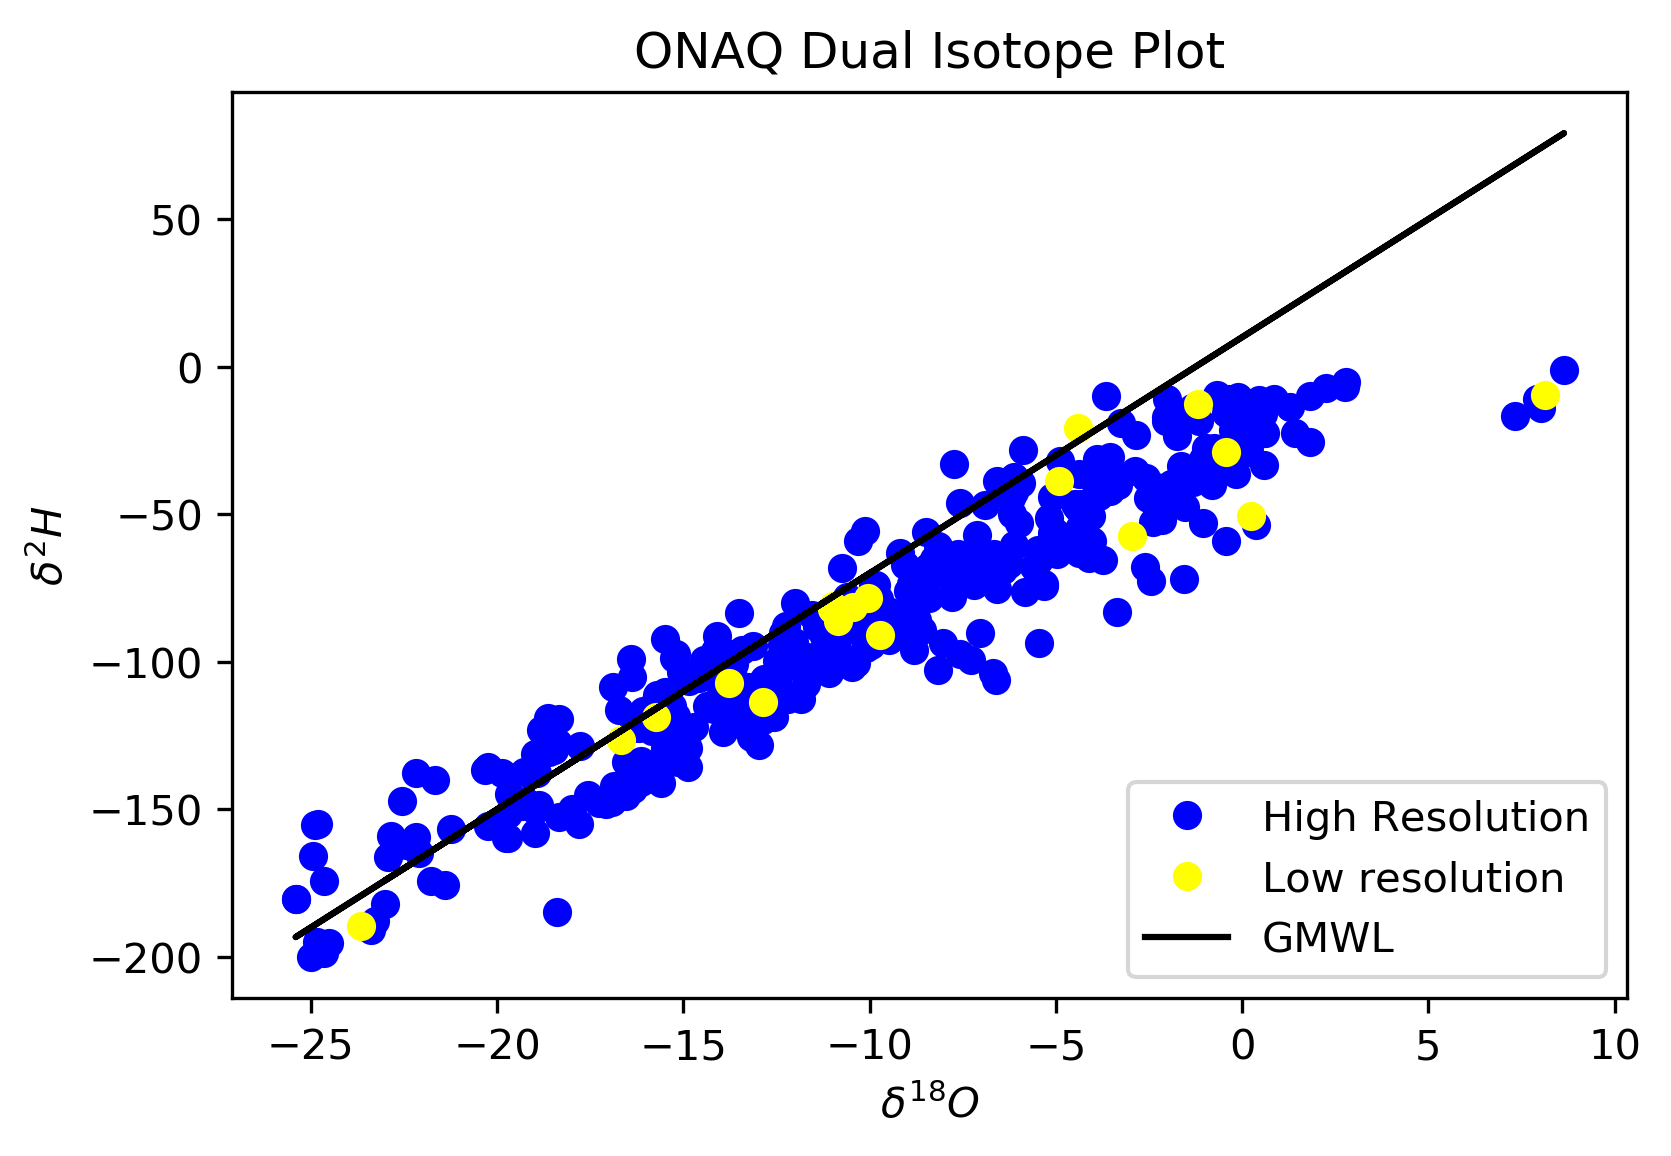

In [156]:
# creating figure 2: dual isotope plot

# define GMWL
GMWL = 8*d18O + 10

plt.plot(d18O, d2H, 'o', color='blue', label="High Resolution")
plt.plot(biweekly_O, biweekly_H, 'o', color='yellow', label="Low resolution")
plt.plot(d18O, GMWL, color='black', label="GMWL")
plt.title(str(sitename)+" Dual Isotope Plot")
plt.xlabel("$\delta^{18}O$")
plt.ylabel("$\delta^{2}H$")
plt.legend(loc="lower right")

#plt.savefig(ROOTDIR+'/FIGURES/'+str(sitename)+'_Dual_Iso', transparent=True)

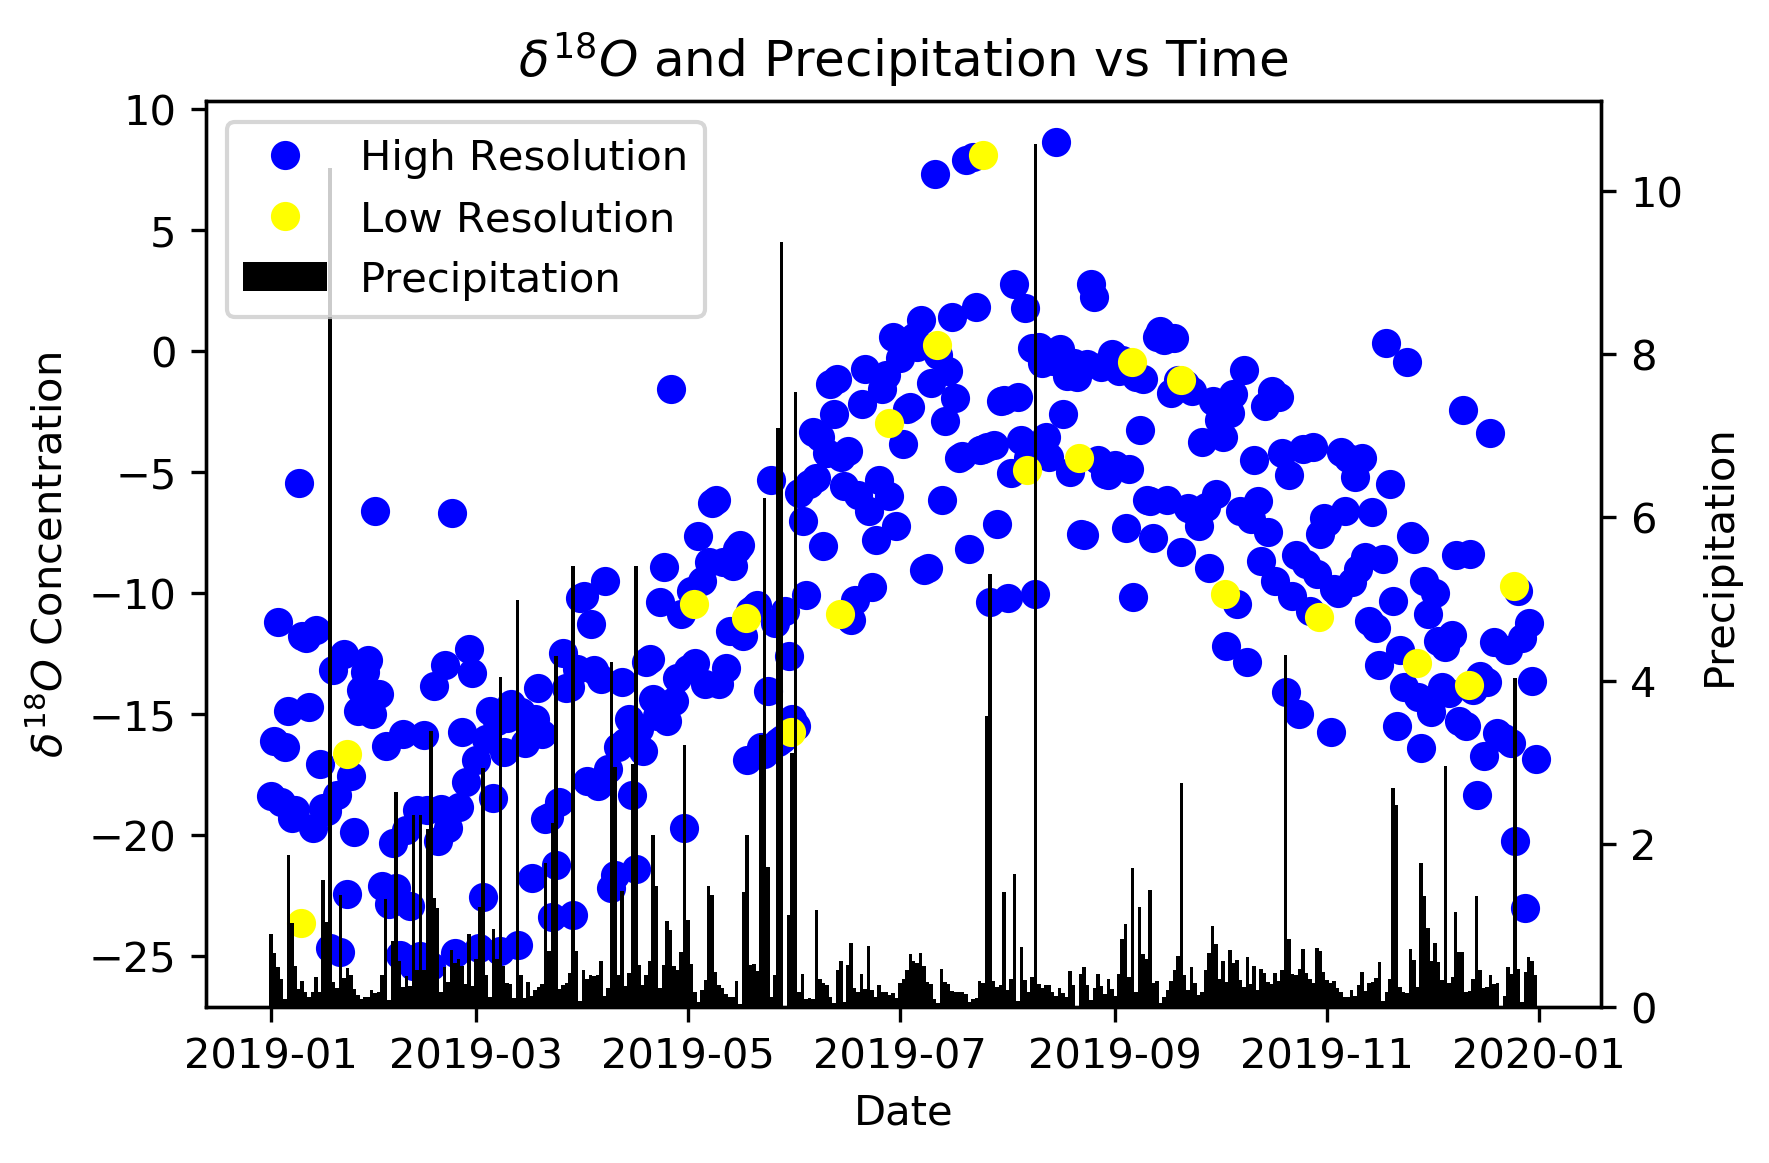

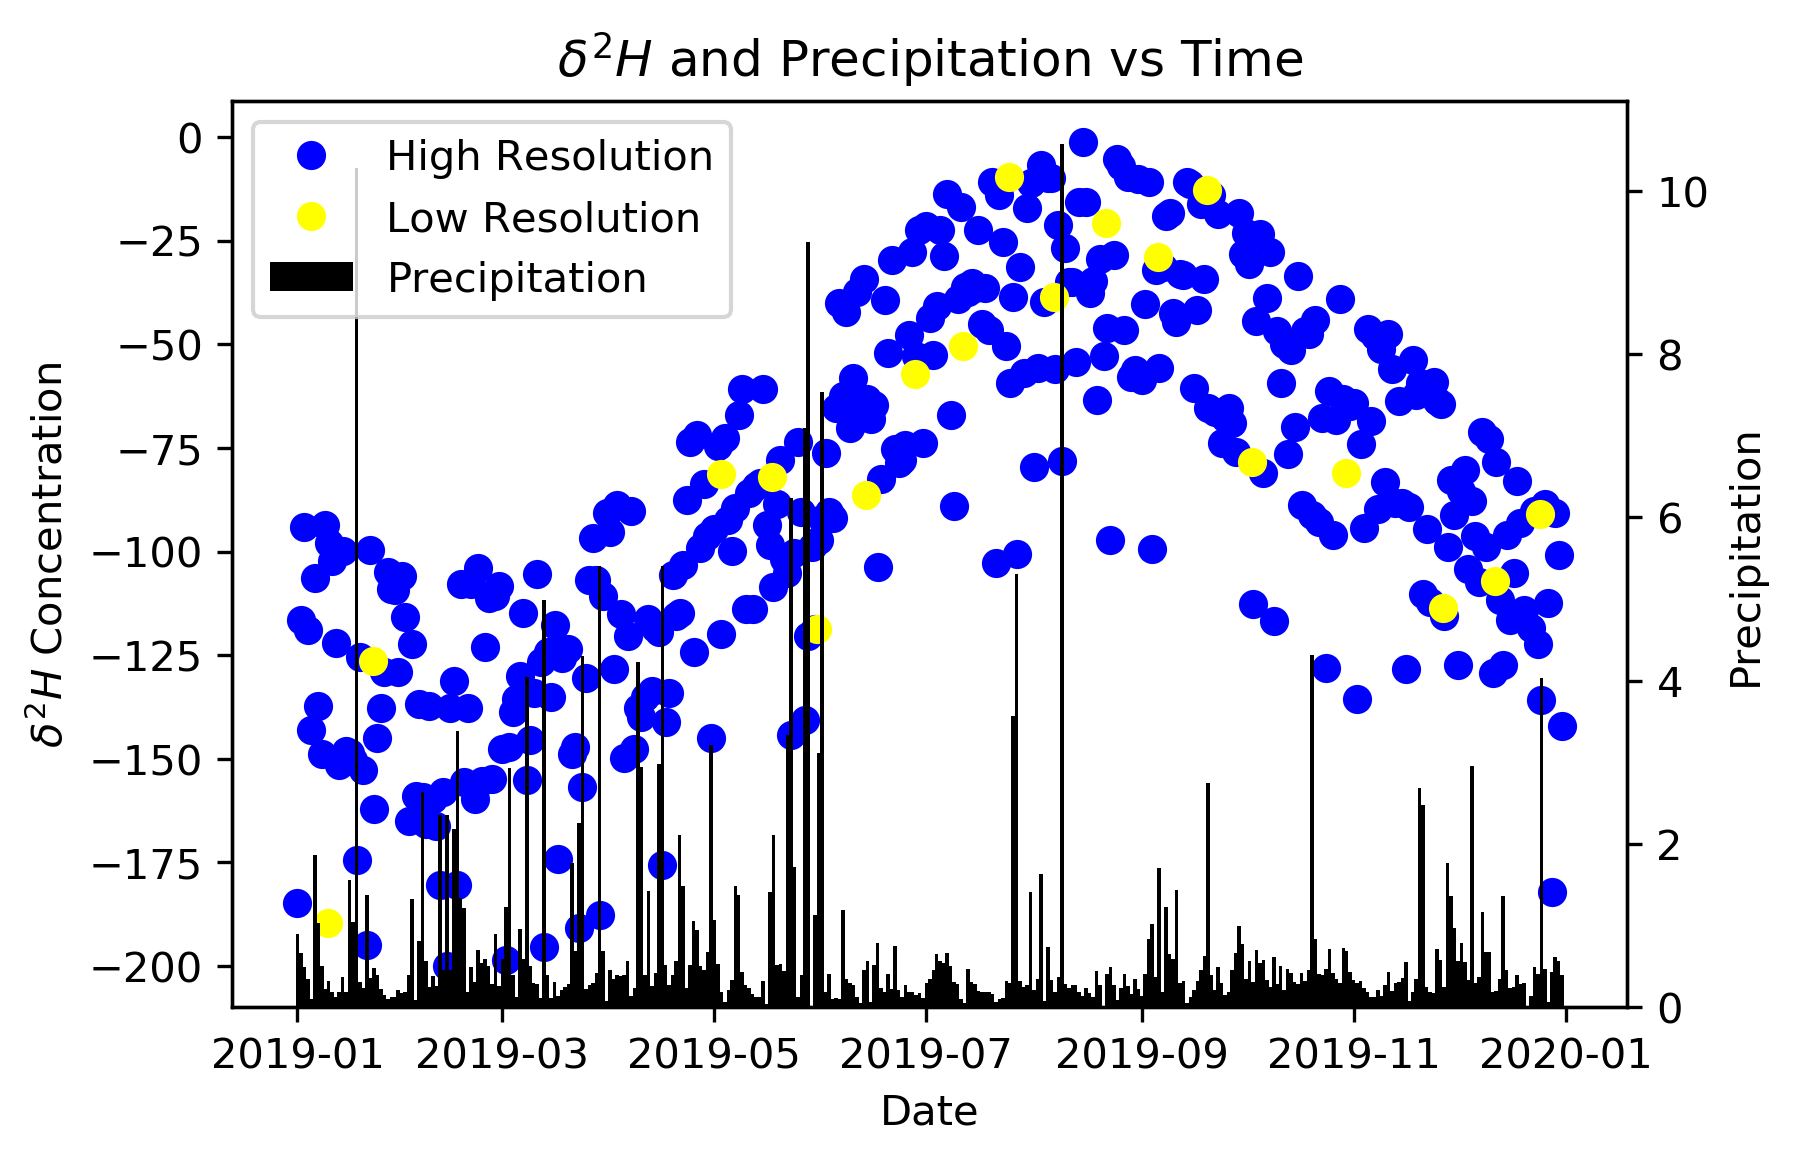

In [162]:
# creating an isotope and precipitation vs time plot

# d18O plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(t, d18O, 'o', color='blue', label='High Resolution')
ax1.plot(biweekly_t, biweekly_O, 'o', color='yellow', label='Low Resolution')
ax2.bar(t, P, color='black', label='Precipitation', width=1)

ax1.set_title('$\delta^{18}O$ and Precipitation vs Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('$\delta^{18}O$ Concentration')
ax2.set_ylabel('Precipitation')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.savefig(ROOTDIR+'/FIGURES/'+'d18O_Plot', transparent=True)

# d2H plot
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()

ax3.plot(t, d2H, 'o', color='blue', label='High Resolution')
ax3.plot(biweekly_t, biweekly_H, 'o', color='yellow', label='Low Resolution')
ax4.bar(t, P, color='black', label='Precipitation', width=1)

ax3.set_title('$\delta^{2}H$ and Precipitation vs Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('$\delta^{2}H$ Concentration')
ax4.set_ylabel('Precipitation')

lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax4.legend(lines3 + lines4, labels3 + labels4, loc='upper left')
plt.savefig(ROOTDIR+'/FIGURES/'+'d2H_Plot', transparent=True)

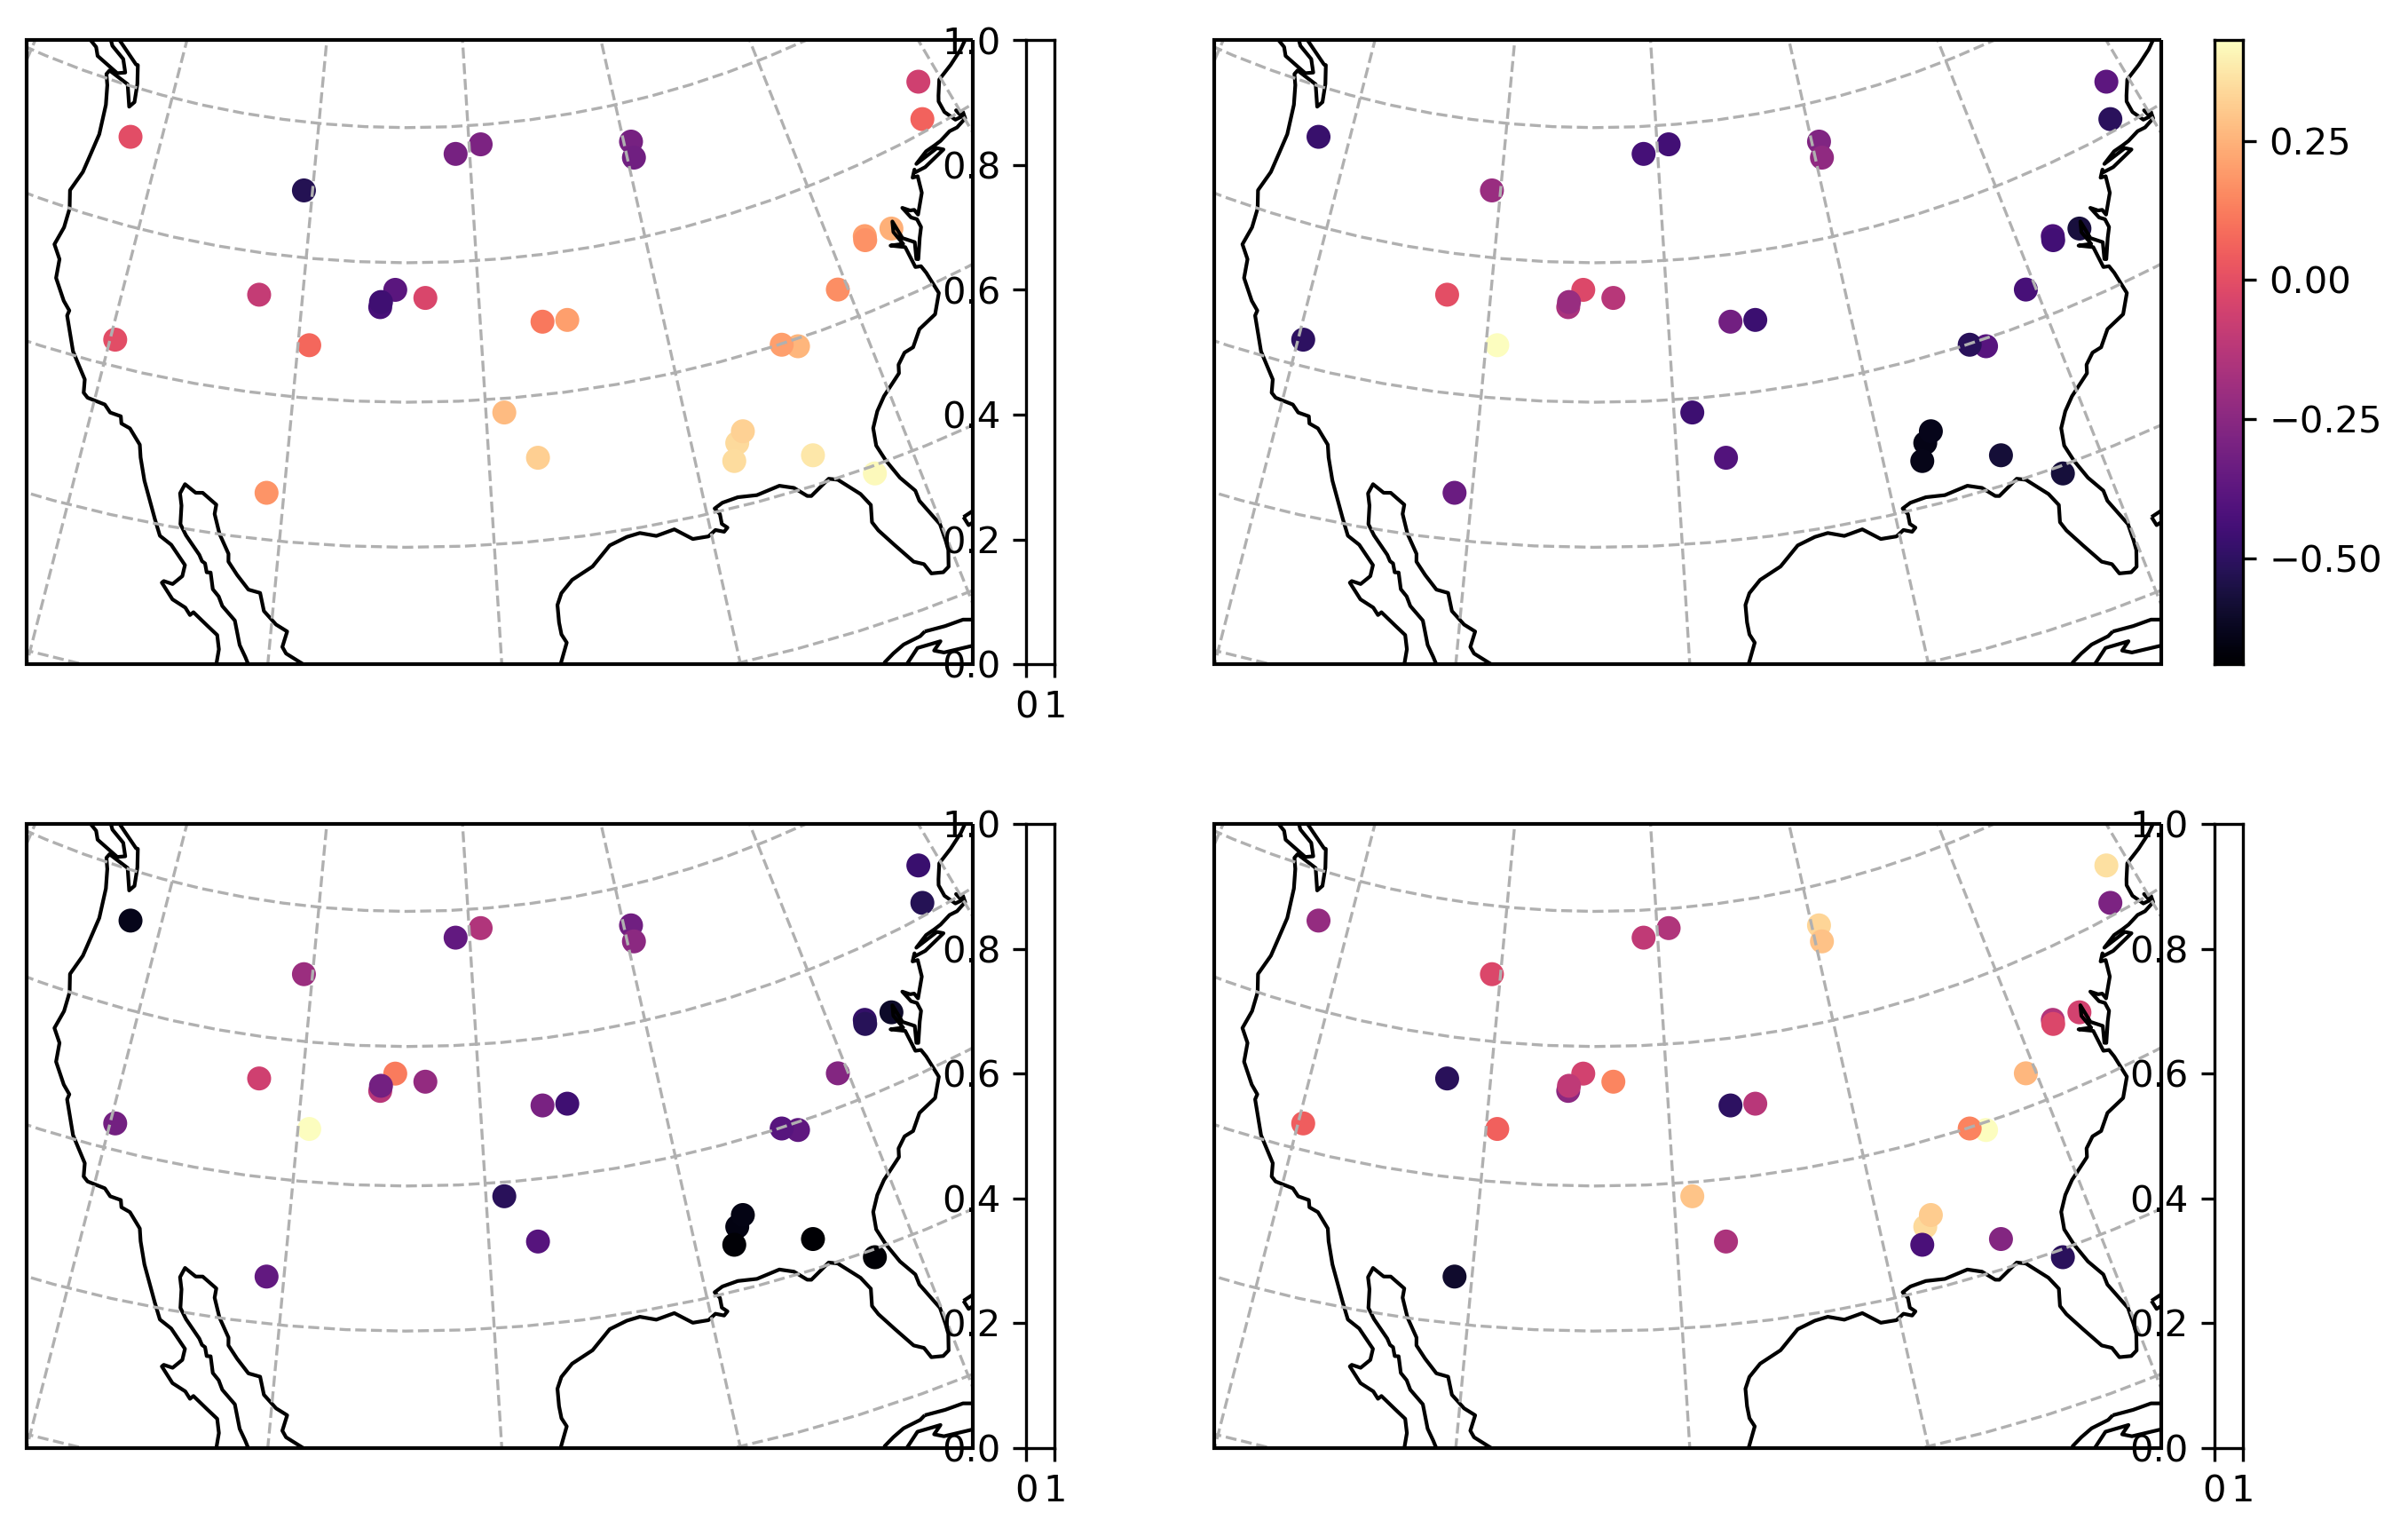

<Figure size 1800x1200 with 0 Axes>

In [155]:
# creating summary maps - ignore this it's very messy right now

## Python Import Statements
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes

# reading in data
df_summary = pd.read_csv(ROOTDIR+'/FIGURES/'+'Site_Summary_Table.csv')
lat = df_summary['Latitude']
long = df_summary['Longitude']

plt.rcParams["figure.dpi"] = 300

canada_east = -80
canada_west = -120
canada_north = 49
canada_south = 23.5

standard_parallels = (49, 77)
central_longitude = -104 

def create_map(variable,label,current_subplot): #variable should be spelled as it is in the summary table, enter as strings
    #plt.figure(1,figsize = (12,7))
    #plt.subplot(2,2,current_subplot)
    #ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_longitude,standard_parallels=standard_parallels))
    # creates the bounding box
    ax = current_subplot
    ax.set_extent([canada_west, canada_east, canada_south, canada_north],ccrs.Geodetic())
    #ax.stock_img(alpha=0.2) # inserts a picture of the US
    ax.gridlines(linestyle='--')
    ax.coastlines()
    
    values=df_summary[variable]
    
    #ax.add_feature(cfeature.STATES, linewidth = 0.5) #state boundaries
    im=ax.scatter(long, lat, alpha=1, s=30,
           c=values,
            cmap=plt.get_cmap("magma"), 
            transform=ccrs.PlateCarree())
    axgr.cbar_axes[1].colorbar(im)
    #cbar_ax=fig.add_axes([0,0,.1,.1])
    #cbar = cbar_ax.colorbar(im,cax=cbar_ax)
    #cbar.set_label(label, fontsize=12)
    
projection = ccrs.LambertConformal(central_longitude=central_longitude,standard_parallels=standard_parallels)
axes_class = (GeoAxes,
                  dict(map_projection=projection))   
fig = plt.figure(1,figsize = (12,7))
axgr = AxesGrid(fig,111,axes_class=axes_class, nrows_ncols=(2,2),axes_pad=0.6,
                    cbar_location='right',
                    cbar_mode='each',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')
#plt.subplots(ncols=2, nrows=2,
                        #cbar_location='right',subplot_kw={'projection':ccrs.LambertConformal(central_longitude=central_longitude,standard_parallels=standard_parallels)})
create_map('Biweekly Sampling O Mean','$\delta^{18}$O Mean Value [‰]', axgr[0])
create_map('Biweekly Sampling O Std','$\delta^{18}$O Standard Deviation [‰]', axgr[1])
create_map('O Sine Function Amplitude','Amplitude [‰]', axgr[2])
create_map('Precip & O Correlation',"Pearson Correlation Coefficient", axgr[3])
plt.show()
plt.savefig(ROOTDIR+'/FIGURES/'+'Maps', transparent=True)


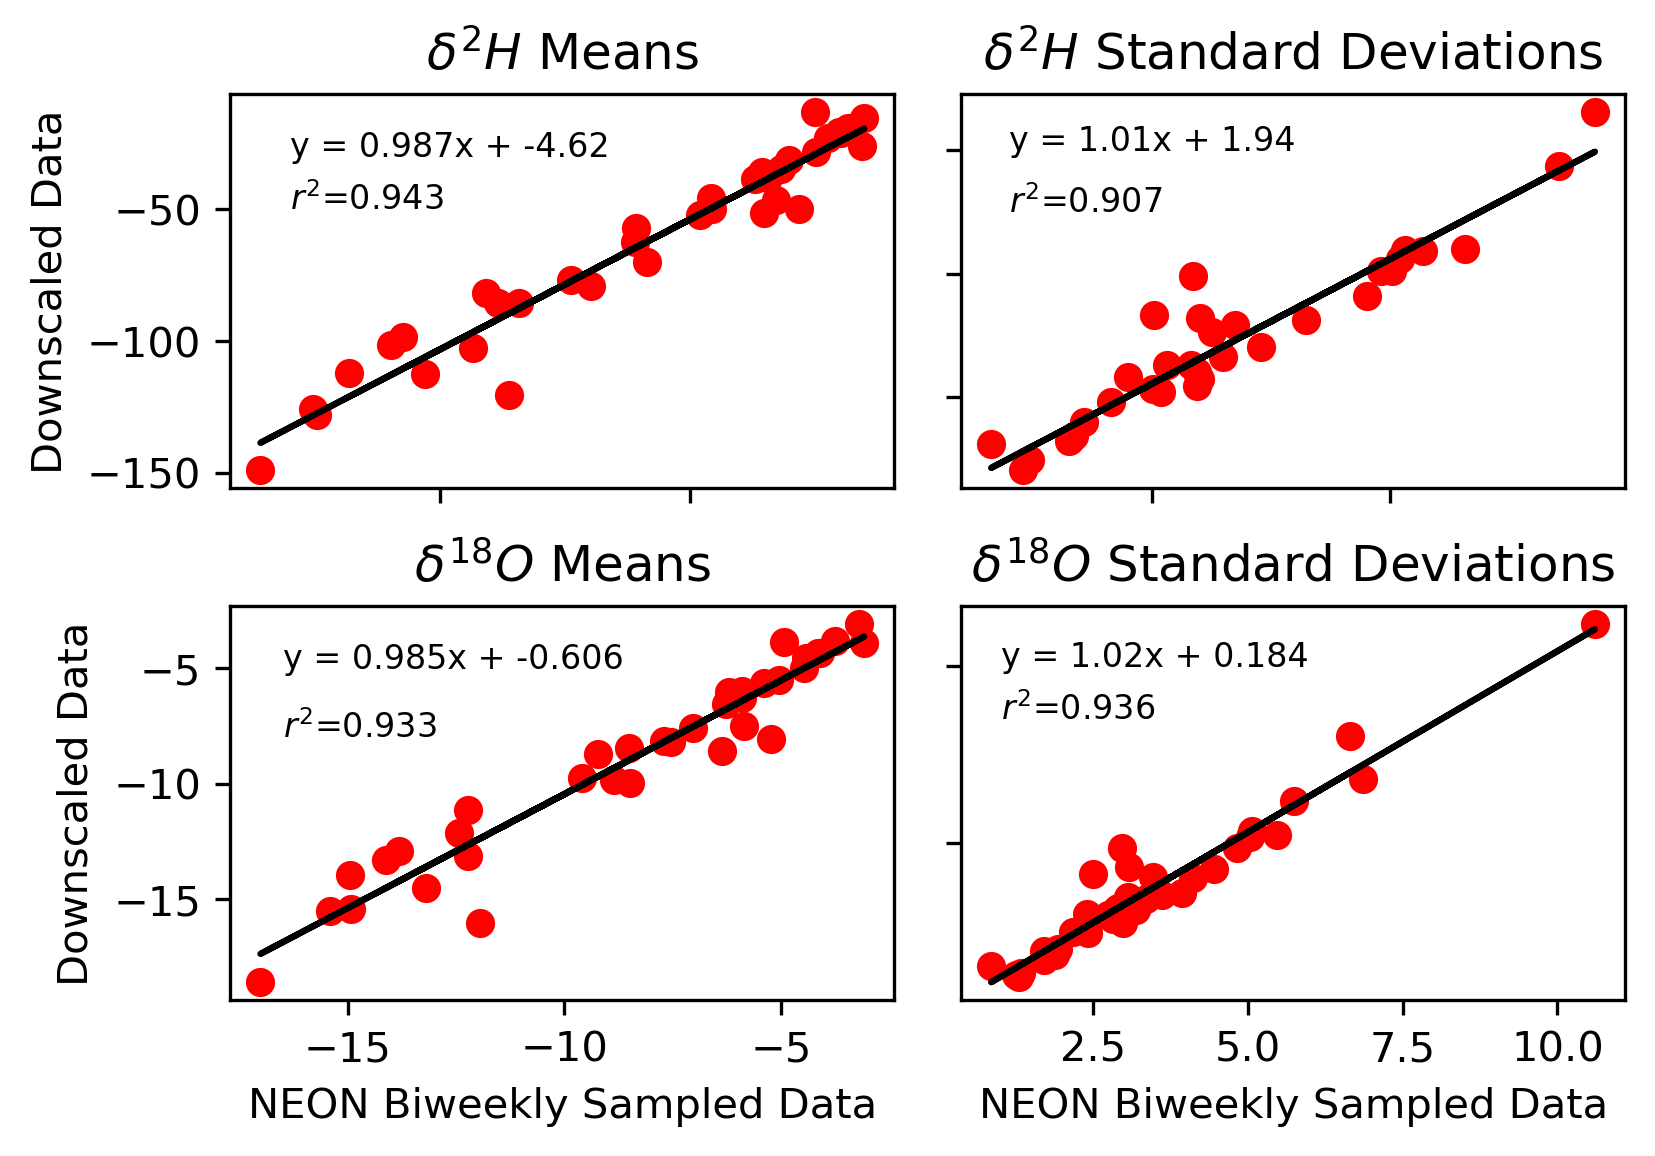

In [89]:
# linear regression for H means
slope_H_means, intercept_H_means, r_value_H_means, p_value_H_means, std_err_H_means = stats.linregress(H_biweekly_mean, H_daily_mean)
H_means_modeled = slope_H_means*np.array(H_biweekly_mean) + intercept_H_means
r2_H_means = r_value_H_means**2

# linear regression for H stds
slope_H_stds, intercept_H_stds, r_value_H_stds, p_value_H_stds, std_err_H_stds = stats.linregress(H_biweekly_std, H_daily_std)
H_stds_modeled = slope_H_stds*np.array(H_biweekly_std) + intercept_H_stds
r2_H_stds = r_value_H_stds**2

# linear regression for O means
slope_O_means, intercept_O_means, r_value_O_means, p_value_O_means, std_err_O_means = stats.linregress(O_biweekly_mean, O_daily_mean)
O_means_modeled = slope_O_means*np.array(O_biweekly_mean) + intercept_O_means
r2_O_means = r_value_O_means**2

# linear regression for O stds
slope_O_stds, intercept_O_stds, r_value_O_stds, p_value_O_stds, std_err_O_stds = stats.linregress(O_biweekly_std, O_daily_std)
O_stds_modeled = slope_O_stds*np.array(O_biweekly_std) + intercept_O_stds
r2_O_stds = r_value_O_stds**2


fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(H_biweekly_mean, H_daily_mean, 'o', color='red')
axs[0, 0].plot(H_biweekly_mean, H_means_modeled, color='black')
axs[0, 0].text(-130, -30, "y = {:.3}x + {:.3}".format(slope_H_means, intercept_H_means), fontsize=8)
axs[0, 0].text(-130, -50, "$r^2$={:.3}".format(r2_H_means), fontsize=8)
axs[0, 0].set_title('$\delta^{2}H$ Means')

axs[0, 1].plot(H_biweekly_std, H_daily_std, 'o', color='red')
axs[0, 1].plot(H_biweekly_std, H_stds_modeled, color='black')
axs[0, 1].text(8, 60, "y = {:.3}x + {:.3}".format(slope_H_stds, intercept_H_stds), fontsize=8)
axs[0, 1].text(8, 50, "$r^2$={:.3}".format(r2_H_stds), fontsize=8)
axs[0, 1].set_title('$\delta^{2}H$ Standard Deviations')

axs[1, 0].plot(O_biweekly_mean, O_daily_mean, 'o', color='red')
axs[1, 0].plot(O_biweekly_mean, O_means_modeled, color='black')
axs[1, 0].text(-16.5, -5, "y = {:.3}x + {:.3}".format(slope_O_means, intercept_O_means), fontsize=8)
axs[1, 0].text(-16.5, -8, "$r^2$={:.3}".format(r2_O_means), fontsize=8)
axs[1, 0].set_title('$\delta^{18}O$ Means')

axs[1, 1].plot(O_biweekly_std, O_daily_std, 'o', color='red')
axs[1, 1].plot(O_biweekly_std, O_stds_modeled, color='black')
axs[1, 1].text(1, 10, "y = {:.3}x + {:.3}".format(slope_O_stds, intercept_O_stds), fontsize=8)
axs[1, 1].text(1, 8.5, "$r^2$={:.3}".format(r2_O_stds), fontsize=8)
axs[1, 1].set_title('$\delta^{18}O$ Standard Deviations')

for ax in axs.flat:
    ax.set(xlabel='NEON Biweekly Sampled Data', ylabel='Downscaled Data')
    ax.label_outer()
    
plt.subplots_adjust(wspace=0.1, hspace=0.3)

plt.savefig(ROOTDIR+'/FIGURES/'+'comparison_plot', transparent=True)

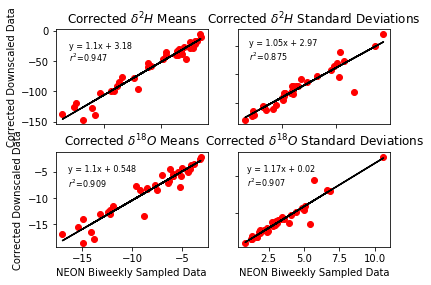

In [10]:
# figure 4: using residual correction

# linear regression for H means
slope_Hrc_means, intercept_Hrc_means, r_value_Hrc_means, p_value_Hrc_means, std_err_Hrc_means = stats.linregress(H_biweekly_mean, H_rc_mean)
Hrc_means_modeled = slope_Hrc_means*np.array(H_biweekly_mean) + intercept_Hrc_means
r2_Hrc_means = r_value_Hrc_means**2

# linear regression for H stds
slope_Hrc_stds, intercept_Hrc_stds, r_value_Hrc_stds, p_value_Hrc_stds, std_err_Hrc_stds = stats.linregress(H_biweekly_std, H_rc_std)
Hrc_stds_modeled = slope_Hrc_stds*np.array(H_biweekly_std) + intercept_Hrc_stds
r2_Hrc_stds = r_value_Hrc_stds**2

# linear regression for O means
slope_Orc_means, intercept_Orc_means, r_value_Orc_means, p_value_Orc_means, std_err_Orc_means = stats.linregress(O_biweekly_mean, O_rc_mean)
Orc_means_modeled = slope_Orc_means*np.array(O_biweekly_mean) + intercept_Orc_means
r2_Orc_means = r_value_Orc_means**2

# linear regression for O stds
slope_Orc_stds, intercept_Orc_stds, r_value_Orc_stds, p_value_Orc_stds, std_err_Orc_stds = stats.linregress(O_biweekly_std, O_rc_std)
Orc_stds_modeled = slope_Orc_stds*np.array(O_biweekly_std) + intercept_Orc_stds
r2_Orc_stds = r_value_Orc_stds**2


fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(H_biweekly_mean, H_rc_mean, 'o', color='red')
axs[0, 0].plot(H_biweekly_mean, Hrc_means_modeled, color='black')
axs[0, 0].text(-130, -30, "y = {:.3}x + {:.3}".format(slope_Hrc_means, intercept_Hrc_means), fontsize=8)
axs[0, 0].text(-130, -50, "$r^2$={:.3}".format(r2_Hrc_means), fontsize=8)
axs[0, 0].set_title('Corrected $\delta^{2}H$ Means')

axs[0, 1].plot(H_biweekly_std, H_rc_std, 'o', color='red')
axs[0, 1].plot(H_biweekly_std, Hrc_stds_modeled, color='black')
axs[0, 1].text(8, 60, "y = {:.3}x + {:.3}".format(slope_Hrc_stds, intercept_Hrc_stds), fontsize=8)
axs[0, 1].text(8, 50, "$r^2$={:.3}".format(r2_Hrc_stds), fontsize=8)
axs[0, 1].set_title('Corrected $\delta^{2}H$ Standard Deviations')

axs[1, 0].plot(O_biweekly_mean, O_rc_mean, 'o', color='red')
axs[1, 0].plot(O_biweekly_mean, Orc_means_modeled, color='black')
axs[1, 0].text(-16.5, -5, "y = {:.3}x + {:.3}".format(slope_Orc_means, intercept_Orc_means), fontsize=8)
axs[1, 0].text(-16.5, -8, "$r^2$={:.3}".format(r2_Orc_means), fontsize=8)
axs[1, 0].set_title('Corrected $\delta^{18}O$ Means')

axs[1, 1].plot(O_biweekly_std, O_rc_std, 'o', color='red')
axs[1, 1].plot(O_biweekly_std, Orc_stds_modeled, color='black')
axs[1, 1].text(1, 10.5, "y = {:.3}x + {:.3}".format(slope_Orc_stds, intercept_Orc_stds), fontsize=8)
axs[1, 1].text(1, 8.5, "$r^2$={:.3}".format(r2_Orc_stds), fontsize=8)
axs[1, 1].set_title('Corrected $\delta^{18}O$ Standard Deviations')

for ax in axs.flat:
    ax.set(xlabel='NEON Biweekly Sampled Data', ylabel='Corrected Downscaled Data')
    ax.label_outer()
    
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.savefig(ROOTDIR+'/FIGURES/'+'comparison_plot_rc', transparent=True)